In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [8]:
df = pd.read_csv('hourly.csv',index_col=0)
df

,hour,year,month,day,HOD,DOW,DOY,WOY,QOD,HOW,Number of Patients,Maximum temperature (°C),Minimum temperature (°C)
0,2004-01-01 00:00:00,2004,1,1,0,Thursday,1,1,0.0,73,5,11.4,11.3
1,2004-01-01 01:00:00,2004,1,1,1,Thursday,1,1,0.0,74,11,11.4,11.4
2,2004-01-01 02:00:00,2004,1,1,2,Thursday,1,1,0.0,75,8,10.9,10.8
3,2004-01-01 03:00:00,2004,1,1,3,Thursday,1,1,0.0,76,4,10.7,10.6
4,2004-01-01 04:00:00,2004,1,1,4,Thursday,1,1,0.0,77,5,10.6,10.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33596,2007-10-31 20:00:00,2007,10,31,20,Wednesday,304,44,3.0,69,15,22.8,22.8
33597,2007-10-31 21:00:00,2007,10,31,21,Wednesday,304,44,3.0,70,23,22.4,22.3
33598,2007-10-31 22:00:00,2007,10,31,22,Wednesday,304,44,3.0,71,19,22.3,22.2
33599,2007-10-31 23:00:00,2007,10,31,23,Wednesday,304,44,3.0,72,16,22.6,22.5


In [9]:
### Split testing and training data

column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[(df['year']==2004) | (df['year']==2005) | (df['year']==2006)]
val_df = df[df['year']==2006]
test_df = df[df['year']==2007]

train_df_1d = train_df[['Number of Patients']]
val_df_1d = val_df[['Number of Patients']]
test_df_1d = test_df[['Number of Patients']]

num_features = train_df_1d.shape[1]

In [10]:
from tbats import TBATS, BATS

In [11]:
# Fit the model
estimator = TBATS(seasonal_periods=(24,24*7,365*24))
start = time.time()
model = estimator.fit(train_df_1d)
end = time.time()
print('Training time:', end-start, 'seconds')

Training time: 5173.4115471839905 seconds


In [18]:
start = time.time()
y_forecast = model.forecast(steps=test_df_1d.shape[0])
end = time.time()
print('Prediction time:', end - start, 'seconds')

Prediction time: 0.029413461685180664 seconds


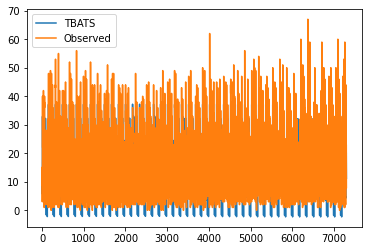

In [15]:
plt.plot(range(len(y_forecast)),y_forecast,label='TBATS')
plt.plot(range(len(y_forecast)),np.array(test_df_1d),label='Observed')
plt.legend()

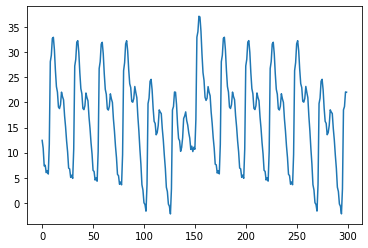

In [16]:
plt.plot(range(300),y_forecast[:300])

In [17]:
sum(abs(y_forecast-np.array(test_df_1d).flatten()))/len(y_forecast)

4.474851444481401

In [19]:
sum(abs(y_forecast-np.array(test_df_1d).flatten())**2)/len(y_forecast)

34.04635203766171

In [57]:
np.savetxt('TBATS.txt', y_forecast)